# Credit Risk of Customers

The dataset consists of 20 features and a class.
It could be used to predict if the customer could be given credit.
Many features require data cleaning.
This is a great dataset for practicing data cleaning and feature engineering and building a binary classification model.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


# Preparing, Cleaning and Analyzing the Dataset

In [7]:
#Importing the dataset
df = pd.read_csv('credit-risk-customers/credit_customers.csv')
df.head().T

,0,1,2,3,4
checking_status,<0,0<=X<200,no checking,<0,<0
duration,6.0,48.0,12.0,42.0,24.0
credit_history,critical/other existing credit,existing paid,critical/other existing credit,existing paid,delayed previously
purpose,radio/tv,radio/tv,education,furniture/equipment,new car
credit_amount,1169.0,5951.0,2096.0,7882.0,4870.0
savings_status,no known savings,<100,<100,<100,<100
employment,>=7,1<=X<4,4<=X<7,4<=X<7,1<=X<4
installment_commitment,4.0,2.0,2.0,2.0,3.0
personal_status,male single,female div/dep/mar,male single,male single,male single
other_parties,none,none,none,guarantor,none


In [8]:
#Check if there is null values in any column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

In [9]:

print(df['class'].value_counts())

good    700
bad     300
Name: class, dtype: int64


In [10]:
#Getting information about the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
credit_amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
installment_commitment,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
residence_since,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
existing_credits,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
num_dependents,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


In [11]:
df.dtypes

checking_status            object
duration                  float64
credit_history             object
purpose                    object
credit_amount             float64
savings_status             object
employment                 object
installment_commitment    float64
personal_status            object
other_parties              object
residence_since           float64
property_magnitude         object
age                       float64
other_payment_plans        object
housing                    object
existing_credits          float64
job                        object
num_dependents            float64
own_telephone              object
foreign_worker             object
class                      object
dtype: object

In [12]:
# loop through each column in the dataframe and count unique values
for column in df.columns:
    unique_values = df[column].nunique()
    print(f"{column}: {unique_values}")

checking_status: 4
duration: 33
credit_history: 5
purpose: 10
credit_amount: 921
savings_status: 5
employment: 5
installment_commitment: 4
personal_status: 4
other_parties: 3
residence_since: 4
property_magnitude: 4
age: 53
other_payment_plans: 3
housing: 3
existing_credits: 4
job: 4
num_dependents: 2
own_telephone: 2
foreign_worker: 2
class: 2


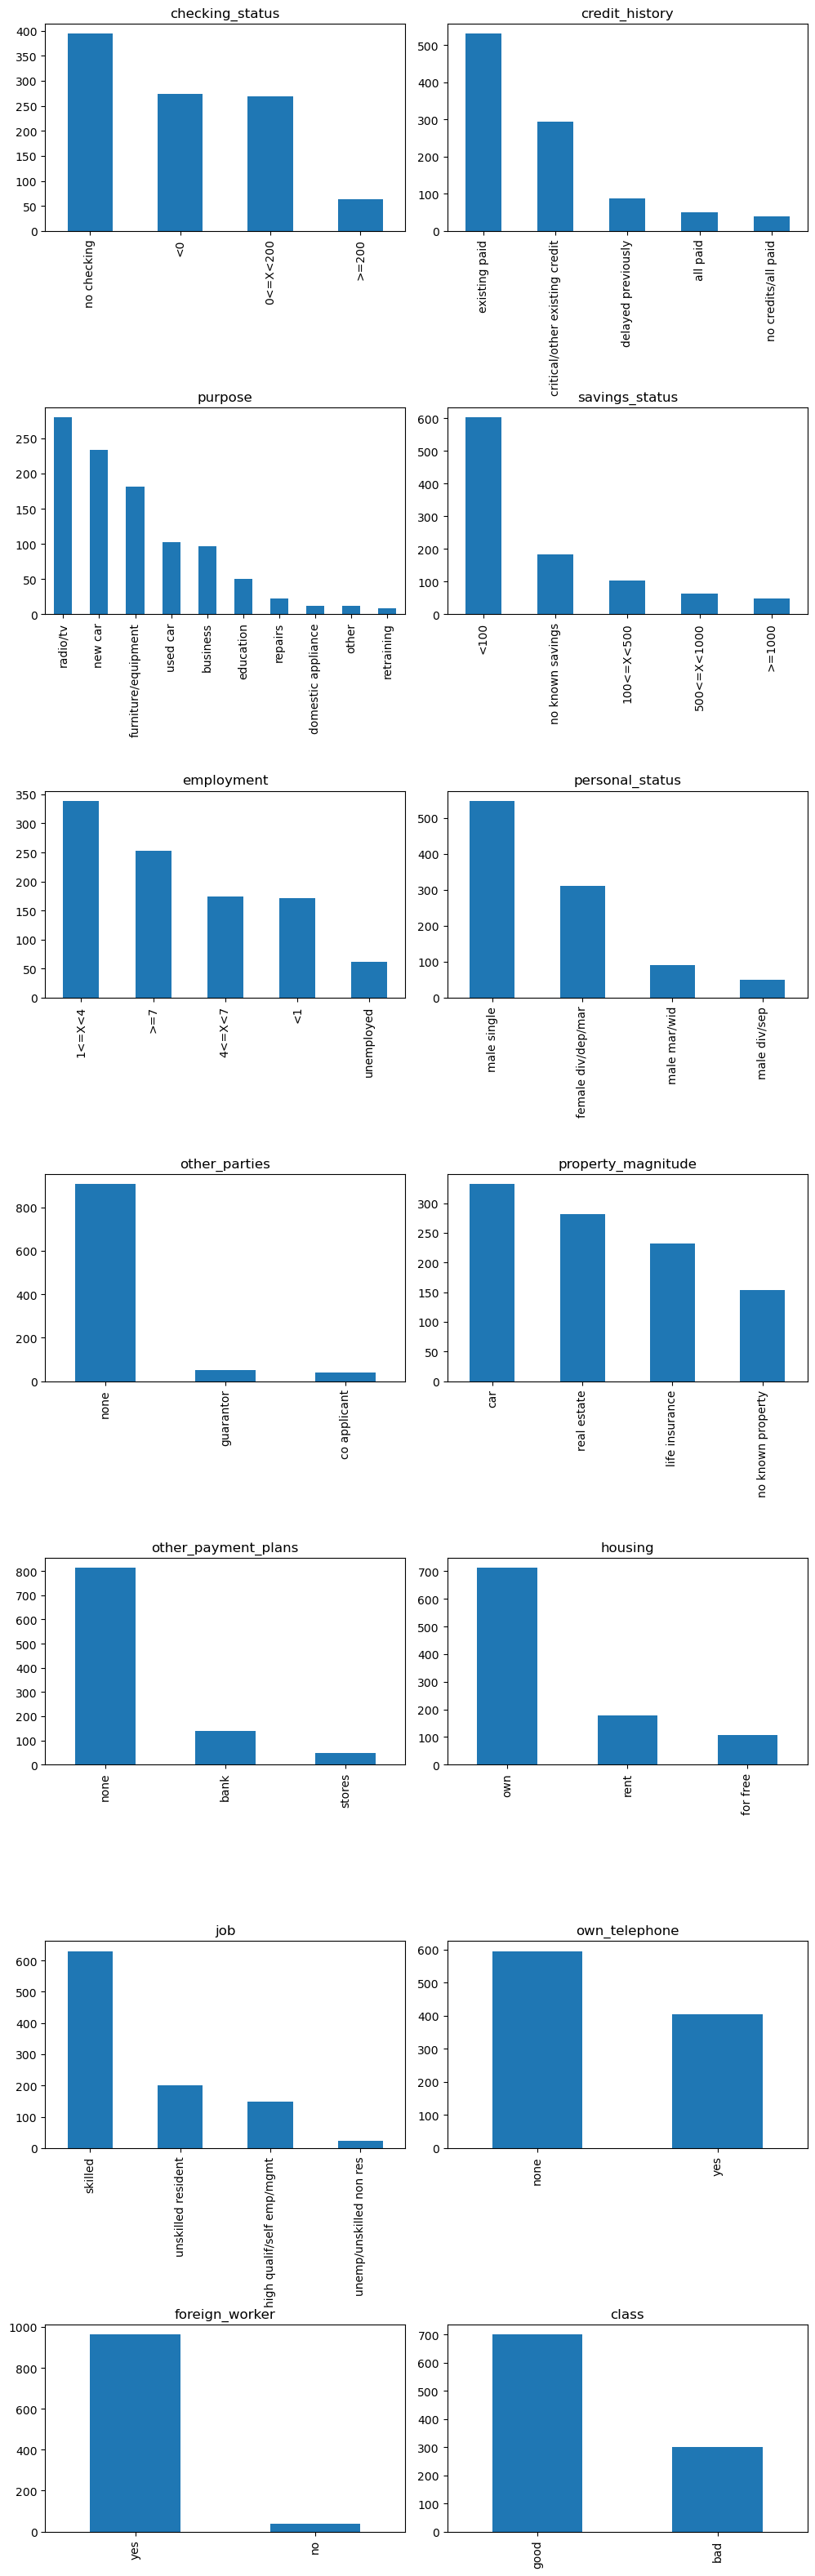

In [13]:
plt.figure(figsize = (10, 50))

c = ['tab:blue']#, 'tab:orange', 'tab:green', 'tab:purple', 'tab:red', 'tab:cyan',  'tab:gray', 'tab:brown', 'tab:olive']

category_list=df.select_dtypes(include='object').columns

'''
category_list=[]
# iterating the columns for getting categories
for item in df.columns:
    if df[item].dtypes=='O': #add to list only objects
        category_list.append(item)
'''

x=0
for i in category_list:
    x+=1
    plt.subplot(11, 2, x)
    plt.xticks(rotation=90)
    plt.gca().set_title(i)
    num_category=df[i].nunique() #get number of categories each column
    df[i].value_counts().plot(kind='bar', color = c[0:num_category], alpha=1.0, grid=False)
    if x==1 or x==2:
        plt.tight_layout()


In [14]:
new_df = df.copy()
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

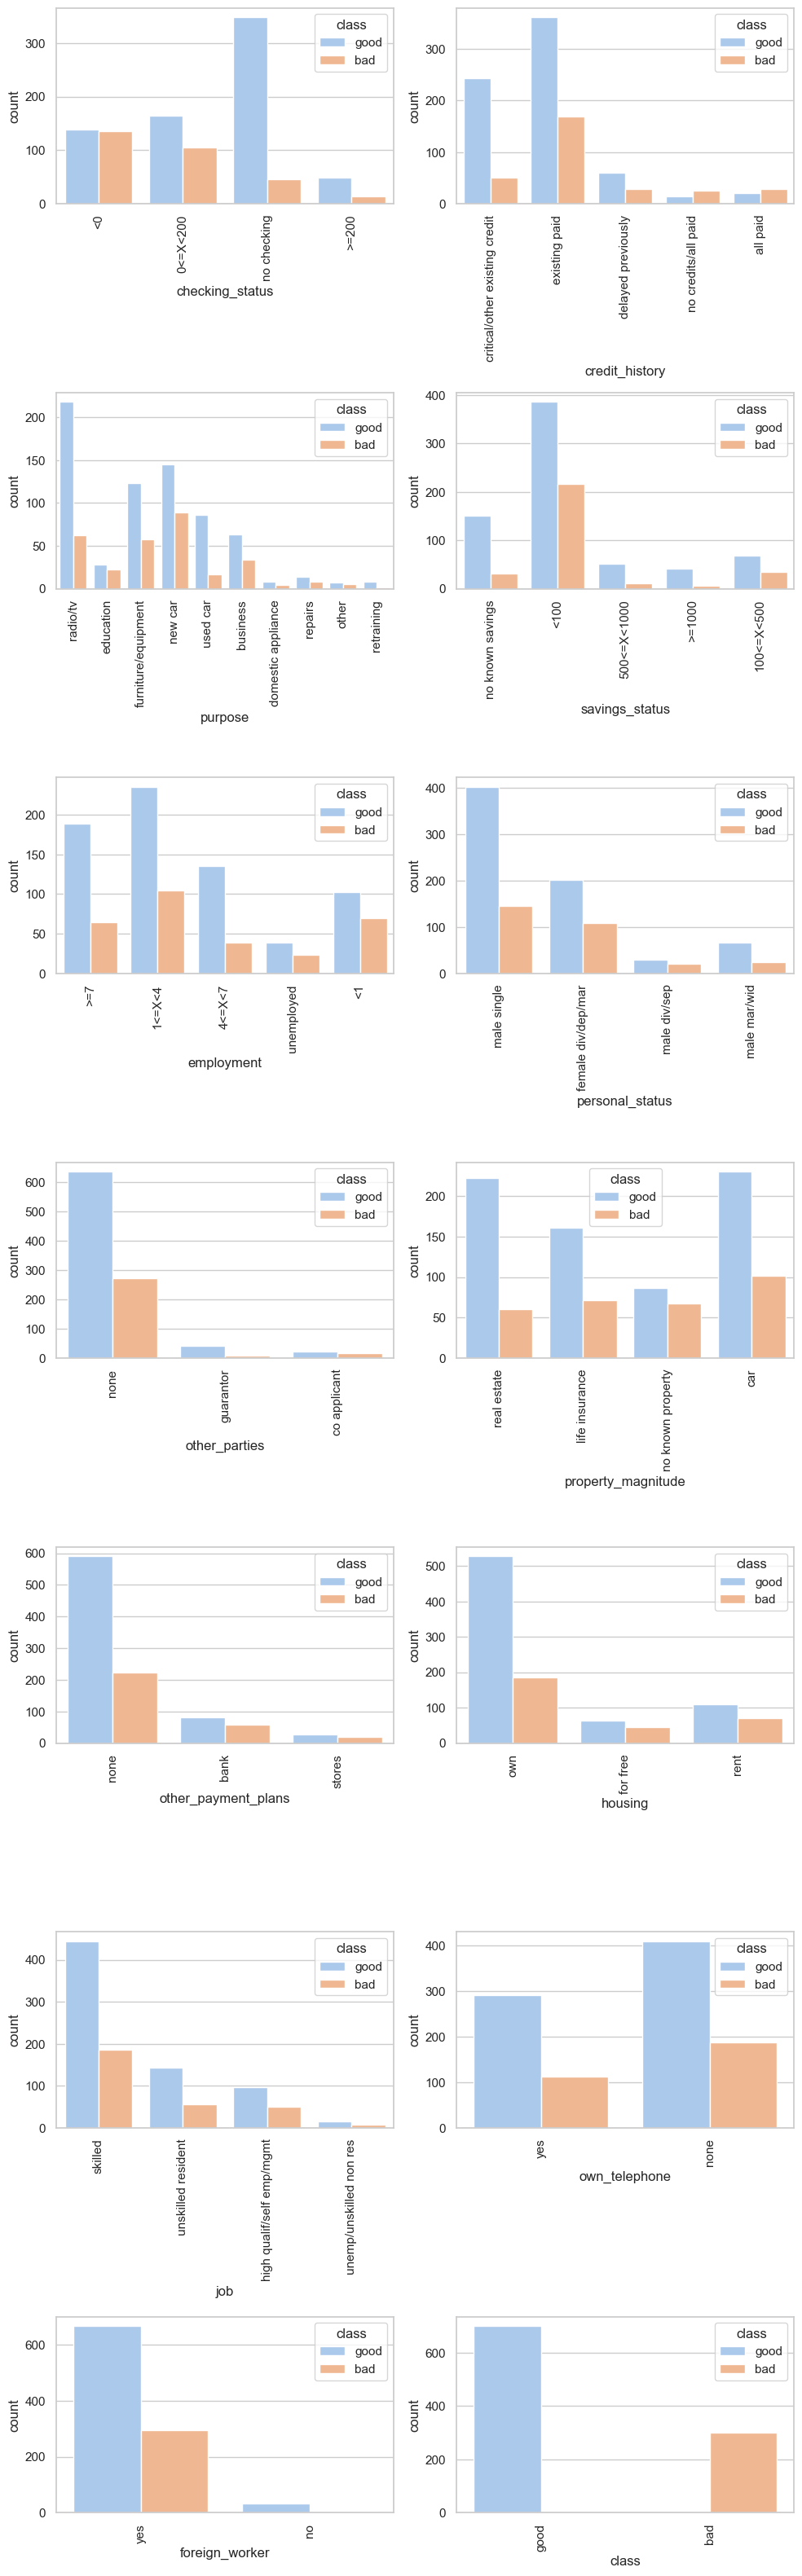

In [15]:
sns.set_theme(style="whitegrid", palette="pastel")
plt.figure(figsize = (10, 50))

category_list = df.select_dtypes(include='object').columns

'''
# iterating the columns for getting categories
category_list=[]
for item in df.columns:
    if item=='class' or item=='age' or item=='duration' or item=='credit_amount' or item=='installment_commitment'or item=='residence_since'or item=='existing_credits':
        category_list.append(item)
    else:
    category_list.append(item)
'''

x=0
for i in category_list:
    x+=1
    plt.subplot(11, 2, x)
    plt.xticks(rotation=90)
    #plt.gca().set_title(i)
    sns.countplot(x = i, hue = 'class',  data = df)
    if x==1 or x==2:
        plt.tight_layout()


In [16]:
def Label_Encoder(df):
    object_cols = df.select_dtypes(include='object').columns
    for col in object_cols:
        df[col] = LabelEncoder().fit_transform(df[col])
    return df

Label_Encoder(df)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,1,6.0,1,6,1169.0,4,3,4.0,3,2,...,3,67.0,1,1,2.0,1,1.0,1,1,1
1,0,48.0,3,6,5951.0,2,0,2.0,0,2,...,3,22.0,1,1,1.0,1,1.0,0,1,0
2,3,12.0,1,2,2096.0,2,1,2.0,3,2,...,3,49.0,1,1,1.0,3,2.0,0,1,1
3,1,42.0,3,3,7882.0,2,1,2.0,3,1,...,1,45.0,1,0,1.0,1,2.0,0,1,1
4,1,24.0,2,4,4870.0,2,0,3.0,3,2,...,2,53.0,1,0,2.0,1,2.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,12.0,3,3,1736.0,2,1,3.0,0,2,...,3,31.0,1,1,1.0,3,1.0,0,1,1
996,1,30.0,3,9,3857.0,2,0,4.0,1,2,...,1,40.0,1,1,1.0,0,1.0,1,1,1
997,3,12.0,3,6,804.0,2,3,4.0,3,2,...,0,38.0,1,1,1.0,1,1.0,0,1,1
998,1,45.0,3,6,1845.0,2,0,4.0,3,2,...,2,23.0,1,0,1.0,1,1.0,1,1,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   int32  
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   int32  
 3   purpose                 1000 non-null   int32  
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   int32  
 6   employment              1000 non-null   int32  
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   int32  
 9   other_parties           1000 non-null   int32  
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   int32  
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   int32  
 14  housing                 1000 non-null   i

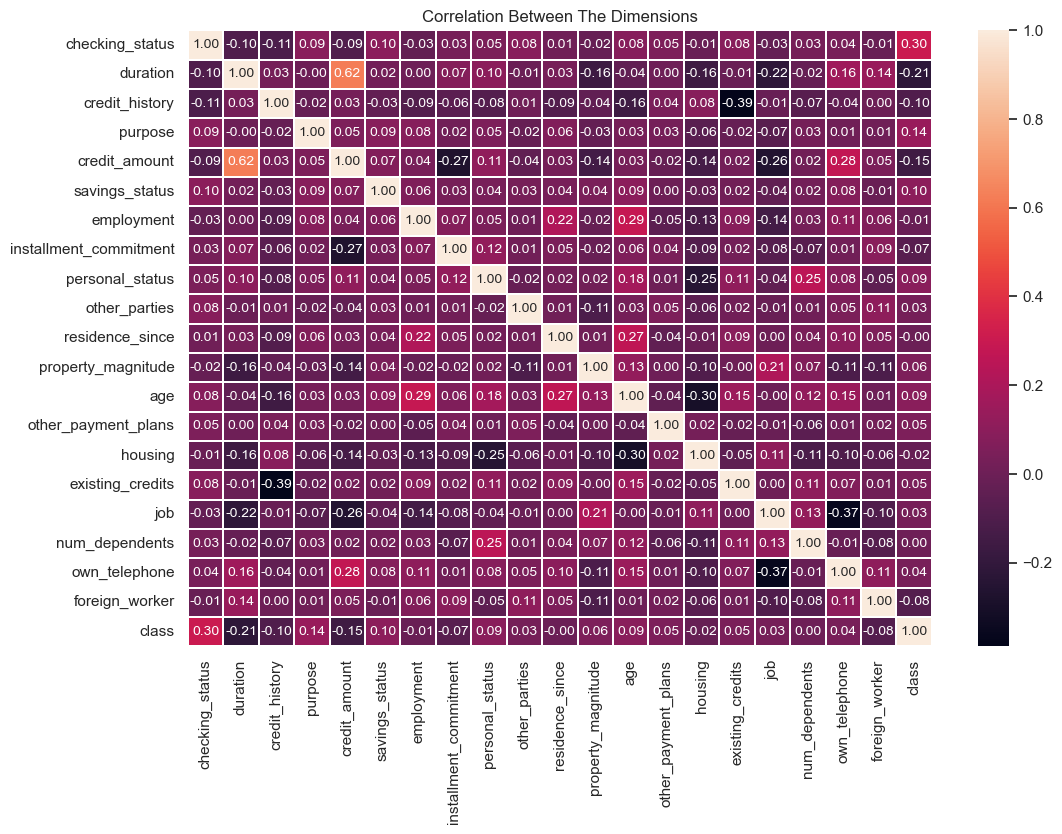

In [18]:

#Correlation matrix 
fig=plt.gcf()
fig.set_size_inches(12, 8)
plt.title('Correlation Between The Dimensions')
a = sns.heatmap(df.corr(), annot = True, annot_kws={"size": 10}, fmt='.2f', linewidths=0.2)
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=0)
plt.show()


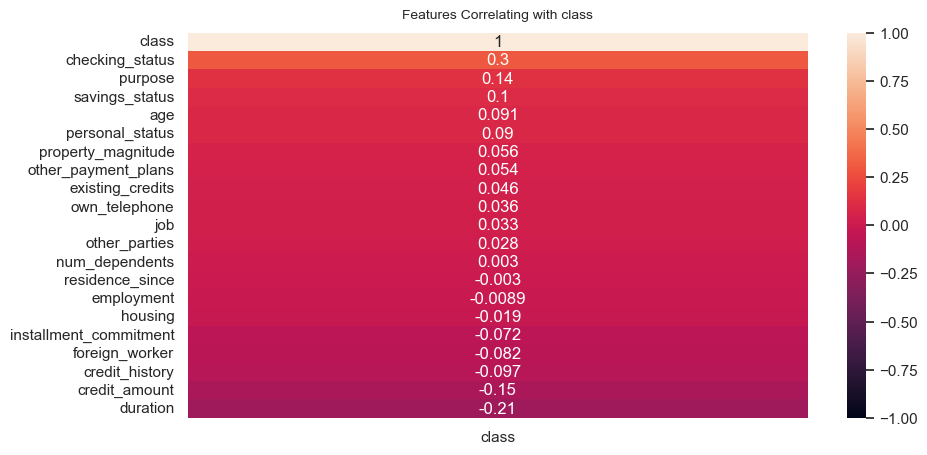

In [19]:
#df['class'] = LabelEncoder().fit_transform(df['class'])

plt.figure (figsize = (10, 5), dpi = 100)
heatmap = sns.heatmap (df.corr()[['class']].sort_values (by = 'class', ascending = False), vmin = -1, vmax = 1, annot = True)
heatmap.set_title ('Features Correlating with class', fontdict = {'fontsize':10}, pad = 10);

In [20]:

df=new_df.copy()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

# Feature Selection and Extraction, and Reducing Dimension

In [21]:
# define a function to drop words from feature
def drop_words(s, words):
    for word in words:
        s = s.replace(word, '')
    return s.strip()

In [22]:
# create a new column
df['employment_new'] = 'employed'
# define a regular expression pattern
gender_pattern = re.compile(r'(unemployed)', flags=re.IGNORECASE)
# loop through each row in the dataframe
for index, row in df.iterrows():
    match = gender_pattern.search(row['employment'])
    if match:
        df.at[index, 'employment_new'] = match.group()
        row['employment'] = gender_pattern.sub('', row['employment'])     
# drop the words
words_to_drop = ['>', '<', '=', 'unemployed']
df['employment'] = df['employment'].apply(lambda x: drop_words(x, words_to_drop))
#df.drop('personal_status', inplace=True, axis=1)
del df['employment']

In [23]:
# create a new column
df['gender'] = 'Unknown'
# define a regular expression pattern
gender_pattern = re.compile(r'(male|female)', flags=re.IGNORECASE)
# loop through each row in the dataframe
for index, row in df.iterrows():
    match = gender_pattern.search(row['personal_status'])
    if match:
        df.at[index, 'gender'] = match.group()
        row['personal_status'] = gender_pattern.sub('', row['personal_status'])
# drop the words
words_to_drop = ['male', 'female', 'fe']
df['personal_status'] = df['personal_status'].apply(lambda x: drop_words(x, words_to_drop))
#df.drop('personal_status', inplace=True, axis=1)
del df['personal_status']

In [24]:
# create a new column
df['job_new'] = 'high_qualified'
# define a regular expression pattern
job_pattern = re.compile(r'(skilled|unskilled)', flags=re.IGNORECASE)
# loop through each row in the dataframe
for index, row in df.iterrows():
    match = job_pattern.search(row['job'])
    if match:
        df.at[index, 'job_new'] = match.group()
        row['job'] = job_pattern.sub('', row['job'])
# drop the words
words_to_drop = ['skilled', 'unskilled']
df['job'] = df['job'].apply(lambda x: drop_words(x, words_to_drop))
#df.drop('personal_status', inplace=True, axis=1)
del df['job']

In [25]:
# create a new column
df['credit_history_new'] = 'existing_paid'
# define a regular expression pattern
credit_pattern = re.compile(r'(all paid|delayed previously)', flags=re.IGNORECASE)
# loop through each row in the dataframe
for index, row in df.iterrows():
    match = credit_pattern.search(row['credit_history'])
    if match:
        df.at[index, 'credit_history_new'] = match.group()
        row['credit_history'] = credit_pattern.sub('', row['credit_history'])
# drop the words
words_to_drop = ['all paid', 'delayed previously']
df['credit_history'] = df['credit_history'].apply(lambda x: drop_words(x, words_to_drop))
#df.drop('personal_status', inplace=True, axis=1)
del df['credit_history']

In [26]:
# create a new column
df['housing_new'] = 'rent'
# define a regular expression pattern
gender_pattern = re.compile(r'(own)', flags=re.IGNORECASE)
# loop through each row in the dataframe
for index, row in df.iterrows():
    match = gender_pattern.search(row['housing'])
    if match:
        df.at[index, 'housing_new'] = match.group()
        row['housing'] = gender_pattern.sub('', row['housing'])
# drop the words
words_to_drop = ['rent', 'own', 'free']
df['housing'] = df['housing'].apply(lambda x: drop_words(x, words_to_drop))
#df.drop('personal_status', inplace=True, axis=1)
del df['housing']

In [27]:
del df['foreign_worker']
del df['own_telephone']
del df['num_dependents']
del df['residence_since']
del df['other_parties']
del df['installment_commitment']
del df['property_magnitude']
del df['other_payment_plans']
del df['existing_credits']
del df['credit_amount']

In [28]:
# Age Group
bins = [0, 30, 40, 50, 60, 70, 120] # Define age groups
labels = ['0-30', '31-40', '41-50', '51-60', '61-70', '70+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, include_lowest=True)
df['age_group']=df['age_group'].astype(object)
del df['age']

# Duration Group
bins = [0, 12, 24, 36, 48, 60, 72] # Define duration groups
labels = ['0-12', '13-24', '25-36', '37-48', '49-60', '61-72']
df['duration_group'] = pd.cut(df['duration'], bins=bins, labels=labels, include_lowest=True)
df['duration_group']=df['duration_group'].astype(object)
del df['duration']

In [29]:
new_df = df.copy()
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   checking_status     1000 non-null   object
 1   purpose             1000 non-null   object
 2   savings_status      1000 non-null   object
 3   class               1000 non-null   object
 4   employment_new      1000 non-null   object
 5   gender              1000 non-null   object
 6   job_new             1000 non-null   object
 7   credit_history_new  1000 non-null   object
 8   housing_new         1000 non-null   object
 9   age_group           1000 non-null   object
 10  duration_group      1000 non-null   object
dtypes: object(11)
memory usage: 86.1+ KB


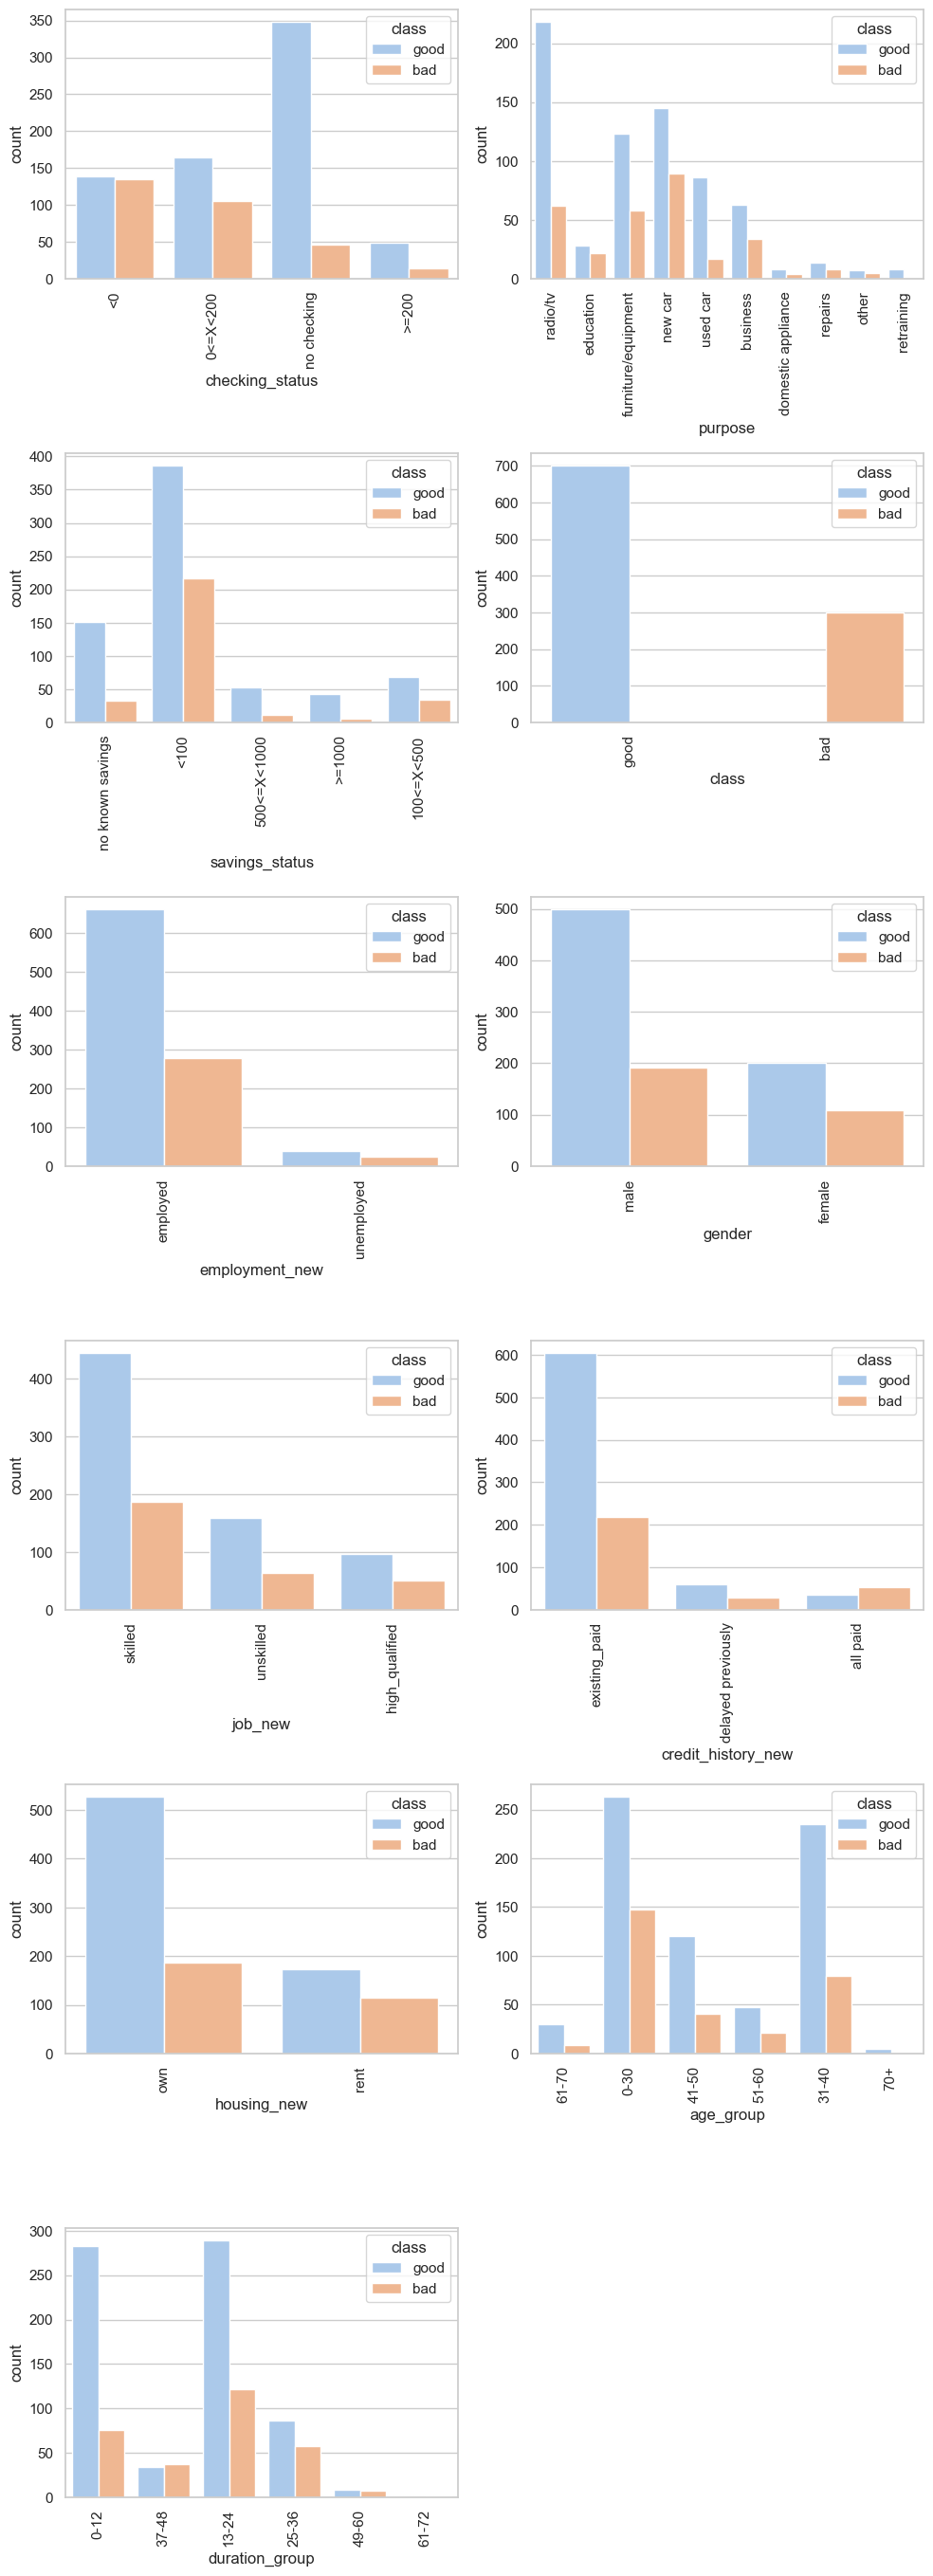

In [30]:
sns.set_theme(style="whitegrid", palette="pastel")
plt.figure(figsize = (10, 50))

category_list = df.select_dtypes(include='object').columns


'''
# iterating the columns for getting categories
category_list=[]
for item in df.columns:
    if item=='class' or item=='age' or item=='duration' or item=='credit_amount' or item=='installment_commitment'or item=='residence_since'or item=='existing_credits':
        category_list.append(item)
    else:
    category_list.append(item)
'''

x=0
for i in category_list:
    x+=1
    plt.subplot(11, 2, x)
    plt.xticks(rotation=90)
    #plt.gca().set_title(i)
    sns.countplot(x = i, hue = 'class',  data = df)
    if x==1 or x==2:
        plt.tight_layout()

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   checking_status     1000 non-null   object
 1   purpose             1000 non-null   object
 2   savings_status      1000 non-null   object
 3   class               1000 non-null   object
 4   employment_new      1000 non-null   object
 5   gender              1000 non-null   object
 6   job_new             1000 non-null   object
 7   credit_history_new  1000 non-null   object
 8   housing_new         1000 non-null   object
 9   age_group           1000 non-null   object
 10  duration_group      1000 non-null   object
dtypes: object(11)
memory usage: 86.1+ KB


In [32]:
Label_Encoder(df)

,checking_status,purpose,savings_status,class,employment_new,gender,job_new,credit_history_new,housing_new,age_group,duration_group
0,1,6,4,1,0,1,1,2,0,4,0
1,0,6,2,0,0,0,1,2,0,0,3
2,3,2,2,1,0,1,2,2,0,2,0
3,1,3,2,1,0,1,1,2,1,2,3
4,1,4,2,0,0,1,1,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...
995,3,3,2,1,0,0,2,2,0,1,0
996,1,9,2,1,0,1,0,2,0,1,2
997,3,6,2,1,0,1,1,2,0,1,0
998,1,6,2,0,0,1,1,2,1,0,3


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   checking_status     1000 non-null   int32
 1   purpose             1000 non-null   int32
 2   savings_status      1000 non-null   int32
 3   class               1000 non-null   int32
 4   employment_new      1000 non-null   int32
 5   gender              1000 non-null   int32
 6   job_new             1000 non-null   int32
 7   credit_history_new  1000 non-null   int32
 8   housing_new         1000 non-null   int32
 9   age_group           1000 non-null   int32
 10  duration_group      1000 non-null   int32
dtypes: int32(11)
memory usage: 43.1 KB


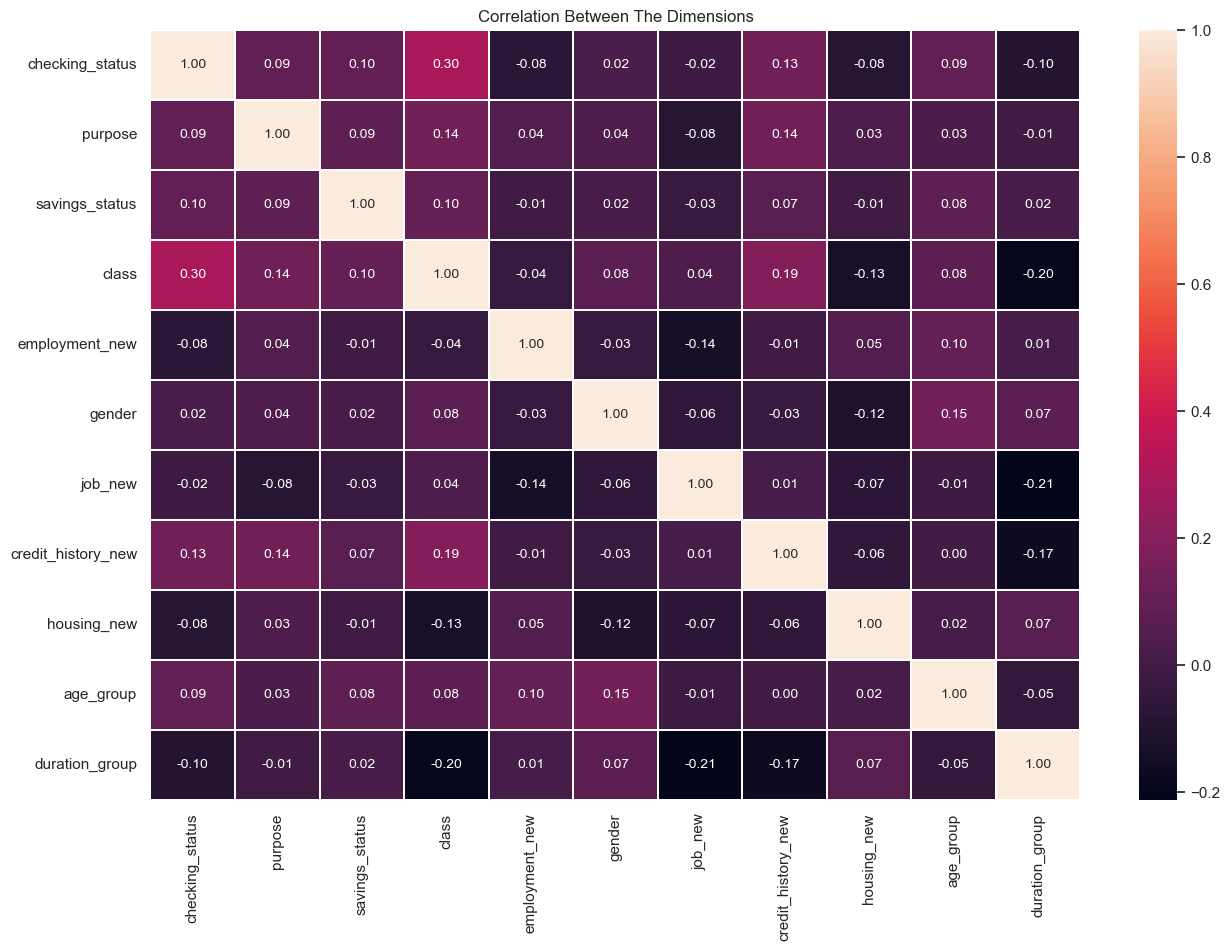

In [34]:
#Correlation matrix 
fig=plt.gcf()
fig.set_size_inches(15, 10)
plt.title('Correlation Between The Dimensions')
a = sns.heatmap(df.corr(), annot = True, annot_kws={"size": 10}, fmt='.2f', linewidths=0.2)
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=0)
plt.show()

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   checking_status     1000 non-null   int32
 1   purpose             1000 non-null   int32
 2   savings_status      1000 non-null   int32
 3   class               1000 non-null   int32
 4   employment_new      1000 non-null   int32
 5   gender              1000 non-null   int32
 6   job_new             1000 non-null   int32
 7   credit_history_new  1000 non-null   int32
 8   housing_new         1000 non-null   int32
 9   age_group           1000 non-null   int32
 10  duration_group      1000 non-null   int32
dtypes: int32(11)
memory usage: 43.1 KB


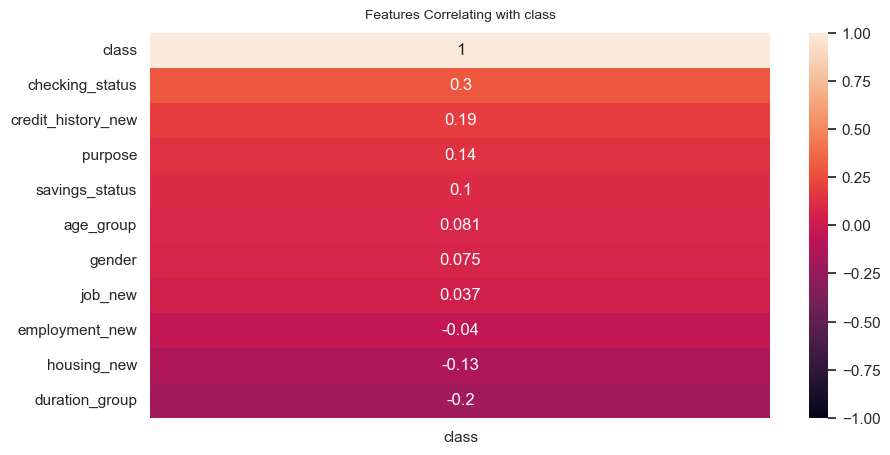

In [36]:
#price_range-class correlations

#df['class'] = LabelEncoder().fit_transform(df['class'])

plt.figure (figsize = (10, 5), dpi = 100)
heatmap = sns.heatmap (df.corr()[['class']].sort_values (by = 'class', ascending = False), vmin = -1, vmax = 1, annot = True)
heatmap.set_title ('Features Correlating with class', fontdict = {'fontsize':10}, pad = 10);

In [37]:
df = new_df.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   checking_status     1000 non-null   object
 1   purpose             1000 non-null   object
 2   savings_status      1000 non-null   object
 3   class               1000 non-null   object
 4   employment_new      1000 non-null   object
 5   gender              1000 non-null   object
 6   job_new             1000 non-null   object
 7   credit_history_new  1000 non-null   object
 8   housing_new         1000 non-null   object
 9   age_group           1000 non-null   object
 10  duration_group      1000 non-null   object
dtypes: object(11)
memory usage: 86.1+ KB


In [38]:
#del df['age_group']
#del df['gender']
del df['job_new']
del df['employment_new']

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   checking_status     1000 non-null   object
 1   purpose             1000 non-null   object
 2   savings_status      1000 non-null   object
 3   class               1000 non-null   object
 4   gender              1000 non-null   object
 5   credit_history_new  1000 non-null   object
 6   housing_new         1000 non-null   object
 7   age_group           1000 non-null   object
 8   duration_group      1000 non-null   object
dtypes: object(9)
memory usage: 70.4+ KB


# Model Building and Configuration

In [40]:
# apply function to df 
df = Label_Encoder(df)
df.head().T

,0,1,2,3,4
checking_status,1,0,3,1,1
purpose,6,6,2,3,4
savings_status,4,2,2,2,2
class,1,0,1,1,0
gender,1,0,1,1,1
credit_history_new,2,2,2,2,1
housing_new,0,0,0,1,1
age_group,4,0,2,2,3
duration_group,0,3,0,3,1


In [41]:
# normalize the numerical columns using MinMaxScaler
scaler = MinMaxScaler()
feature = [ 'checking_status', 'purpose', 'savings_status', 'credit_history_new', 'housing_new', 'duration_group', 'age_group', 'gender']
df[feature] = scaler.fit_transform(df[feature])

In [42]:
# balance the dataset using SMOTE

smote = SMOTE()
X = df.drop('class', axis=1)
y = df['class']
X, y = smote.fit_resample(X, y)
df = pd.concat([X, y], axis=1)



In [43]:
# split the dataset into train and test sets

X_train, X_test, y_train, y_test = train_test_split(df.drop('class', axis=1), df['class'], test_size=0.3, random_state=42)

In [44]:
X_train.shape, y_train.shape

((980, 8), (980,))

In [45]:
def feature_importance_graph(model):
    # Create plot
    plt.figure(figsize=(8, 4))
    # Create plot title
    plt.title("Feature Importance")
    # Get feature importances
    importance = model.feature_importances_
    # Sort feature importances in descending order
    indices = np.argsort(importance)
    # Rearrange feature names so they match the sorted feature importances
    names = [X_train.columns[i] for i in indices]
    # Add bars
    plt.barh(range(X_train.shape[1]), importance[indices])
    # Add feature names as y-axis labels, rotated vertically
    plt.yticks(range(X_train.shape[1]), names, fontsize=10, rotation=0)
    # Show plot
    plt.show()

In [46]:
ros = RandomOverSampler(random_state=0)
X_train, y_train = ros.fit_resample(X_train, y_train)

## XGBoost

In [47]:
# use GridSearchCV to find the best hyperparameters for XGBoost
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 500, 1000]
}

xgb = XGBClassifier(random_state=42)
grid_search = GridSearchCV(xgb, 
                           param_grid=param_grid, 
                           scoring='accuracy', 
                           cv=5, 
                           n_jobs=-1, 
                           verbose=0)

grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 1000}


In [48]:
#train the XGBoost model
xgb = XGBClassifier(max_depth=grid_search.best_params_['max_depth'],
                    learning_rate=grid_search.best_params_['learning_rate'],
                    n_estimators=grid_search.best_params_['n_estimators'],
                    random_state=42)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       202
           1       0.82      0.85      0.83       218

    accuracy                           0.82       420
   macro avg       0.82      0.82      0.82       420
weighted avg       0.82      0.82      0.82       420



<AxesSubplot:>

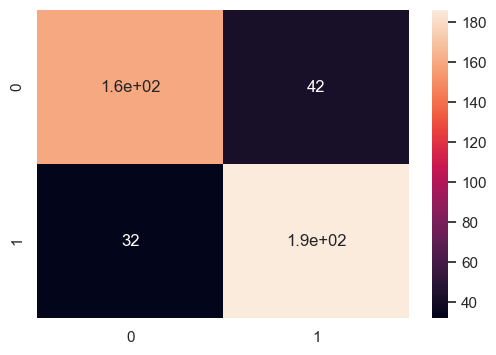

In [49]:
# evaluate the performance of the model
y_pred = xgb.predict(X_test)
print(classification_report(y_test, y_pred))
xgb_accuracy=accuracy_score(y_test, y_pred)
xgb_f1=f1_score(y_test, y_pred)
xgb_recall=recall_score(y_test, y_pred)
xgb_precision=precision_score(y_test, y_pred)

cf_matrix=confusion_matrix(y_test, y_pred)
plt.figure(figsize = (6,4))
sns.heatmap(cf_matrix, annot=True)

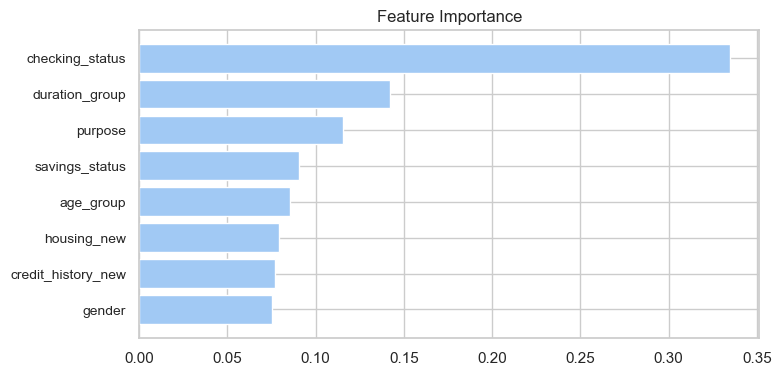

In [50]:
feature_importance_graph(xgb)

## Decision Tree

In [51]:
# use GridSearchCV to find the best hyperparameters for Decision Tree
param_grid = {'max_depth': [3, 4, 5, 6, 7, 9, 11],
              'min_samples_split': [2, 3, 4, 5, 6, 7],
              'criterion': ['entropy', 'gini']
             }

model = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(model,
                            param_grid=param_grid, 
                            scoring='accuracy', 
                            cv=5, 
                            n_jobs=-1, 
                            verbose=0)

grid_search.fit(X_train, y_train)
print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'criterion': 'gini', 'max_depth': 11, 'min_samples_split': 6}


In [52]:
decision_tree = DecisionTreeClassifier(max_depth=grid_search.best_params_['max_depth'],
                    min_samples_split=grid_search.best_params_['min_samples_split'],
                    criterion=grid_search.best_params_['criterion'],
                    random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=11, min_samples_split=6, random_state=42)

              precision    recall  f1-score   support

           0       0.76      0.80      0.78       202
           1       0.80      0.77      0.78       218

    accuracy                           0.78       420
   macro avg       0.78      0.78      0.78       420
weighted avg       0.78      0.78      0.78       420



<AxesSubplot:>

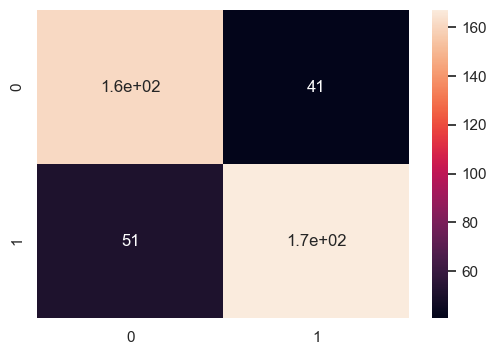

In [53]:
# evaluate the performance of the model
y_pred = decision_tree.predict(X_test)
print(classification_report(y_test, y_pred))
tree_accuracy=accuracy_score(y_test, y_pred)
tree_f1=f1_score(y_test, y_pred)
tree_recall=recall_score(y_test, y_pred)
tree_precision=precision_score(y_test, y_pred)

cf_matrix=confusion_matrix(y_test, y_pred)
plt.figure(figsize = (6,4))
sns.heatmap(cf_matrix, annot=True)

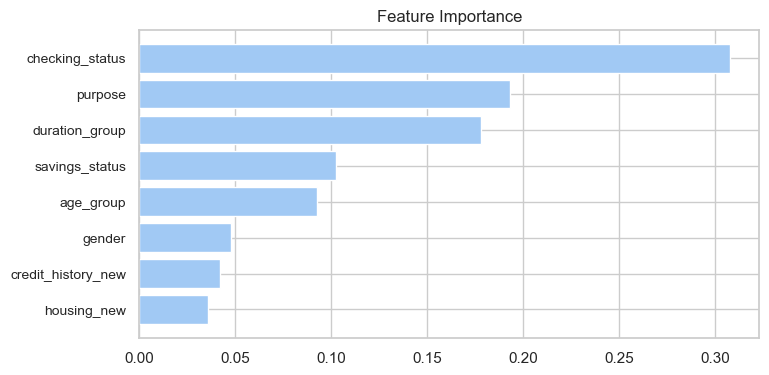

In [54]:
feature_importance_graph(decision_tree)

## Random Forest

In [55]:
# use GridSearchCV to find the best hyperparameters for RandomForest
param_grid = {'max_depth': [3, 4, 5, 6, 7, 9, 11],
              'min_samples_split': [2, 3, 4, 5, 6, 7],
              'criterion': ['entropy', 'gini']
             }

model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(model,
                            param_grid=param_grid, 
                            scoring='accuracy', 
                            cv=5, 
                            n_jobs=-1, 
                            verbose=0)

grid_search.fit(X_train, y_train)
print("Best parameters: ", grid_search.best_params_)


Best parameters:  {'criterion': 'entropy', 'max_depth': 11, 'min_samples_split': 4}


In [56]:
random_forest = RandomForestClassifier(max_depth=grid_search.best_params_['max_depth'],
                    min_samples_split=grid_search.best_params_['min_samples_split'],
                    criterion=grid_search.best_params_['criterion'],
                    random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=11, min_samples_split=4,
                       random_state=42)

              precision    recall  f1-score   support

           0       0.81      0.80      0.81       202
           1       0.82      0.83      0.82       218

    accuracy                           0.81       420
   macro avg       0.81      0.81      0.81       420
weighted avg       0.81      0.81      0.81       420



<AxesSubplot:>

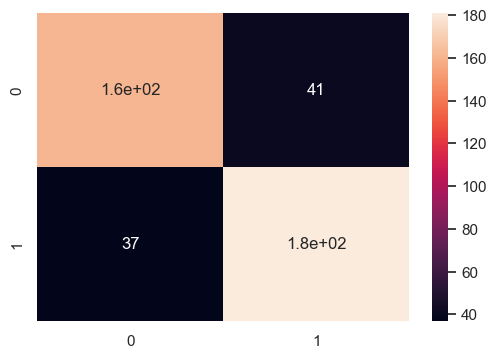

In [57]:
# evaluate the performance of the model
y_pred = random_forest.predict(X_test)
print(classification_report(y_test, y_pred))
random_accuracy=accuracy_score(y_test, y_pred)
random_f1=f1_score(y_test, y_pred)
random_recall=recall_score(y_test, y_pred)
random_precision=precision_score(y_test, y_pred)

cf_matrix=confusion_matrix(y_test, y_pred)
plt.figure(figsize = (6,4))
sns.heatmap(cf_matrix, annot=True)

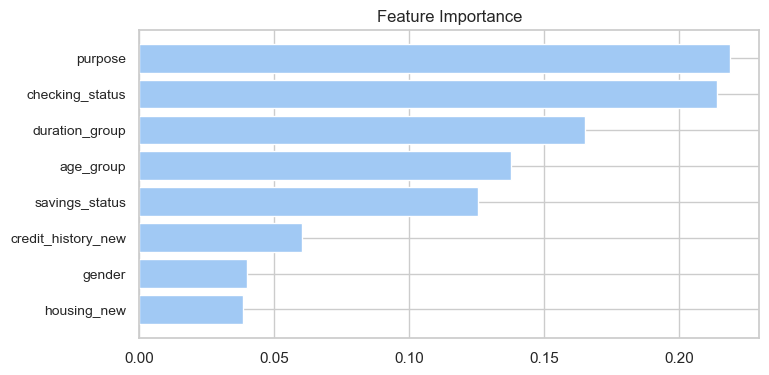

In [58]:
feature_importance_graph(random_forest)

## Extra Trees

In [59]:
# use GridSearchCV to find the best hyperparameters for Extra Trees
param_grid = {'max_depth': [3, 4, 5, 6, 7, 9, 11],
              'min_samples_split': [2, 3, 4, 5, 6, 7],
              'criterion': ['entropy', 'gini']
             }
#'n_estimators': [100, 500, 1000]
model = ExtraTreesClassifier(random_state=42)
grid_search = GridSearchCV(model,
                            param_grid=param_grid, 
                            scoring='accuracy', 
                            cv=5, 
                            n_jobs=-1, 
                            verbose=0)

grid_search.fit(X_train, y_train)
print("Best parameters: ", grid_search.best_params_)


Best parameters:  {'criterion': 'entropy', 'max_depth': 11, 'min_samples_split': 4}


In [60]:
extra_trees = ExtraTreesClassifier(max_depth=grid_search.best_params_['max_depth'],
                    min_samples_split=grid_search.best_params_['min_samples_split'],
                    criterion=grid_search.best_params_['criterion'],
                    random_state=42)
extra_trees.fit(X_train, y_train)

ExtraTreesClassifier(criterion='entropy', max_depth=11, min_samples_split=4,
                     random_state=42)

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       202
           1       0.84      0.79      0.81       218

    accuracy                           0.81       420
   macro avg       0.81      0.81      0.81       420
weighted avg       0.81      0.81      0.81       420



<AxesSubplot:>

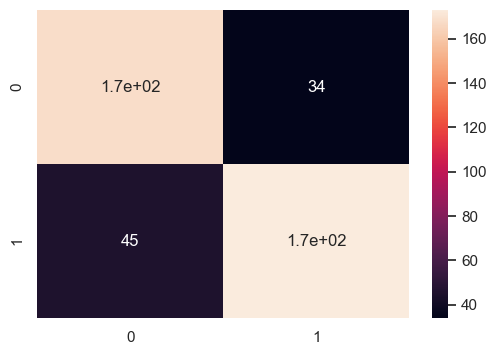

In [61]:
# evaluate the performance of the model
y_pred = extra_trees.predict(X_test)
print(classification_report(y_test, y_pred))
extra_accuracy=accuracy_score(y_test, y_pred)
extra_f1=f1_score(y_test, y_pred)
extra_recall=recall_score(y_test, y_pred)
extra_precision=precision_score(y_test, y_pred)

cf_matrix=confusion_matrix(y_test, y_pred)
plt.figure(figsize = (6,4))
sns.heatmap(cf_matrix, annot=True)

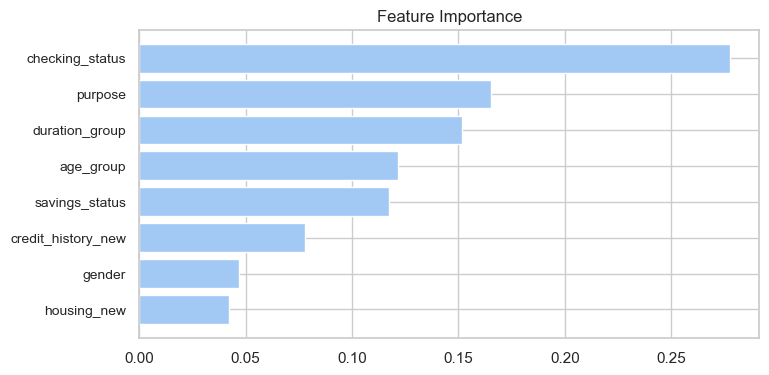

In [62]:
feature_importance_graph(extra_trees)

## Naive Bayes

In [63]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

              precision    recall  f1-score   support

           0       0.71      0.71      0.71       202
           1       0.73      0.73      0.73       218

    accuracy                           0.72       420
   macro avg       0.72      0.72      0.72       420
weighted avg       0.72      0.72      0.72       420



<AxesSubplot:>

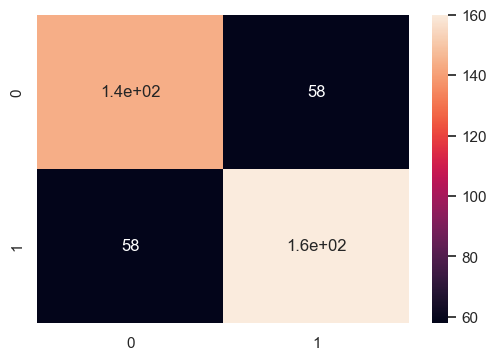

In [64]:
# evaluate the performance of the model
y_pred = naive_bayes.predict(X_test)
print(classification_report(y_test, y_pred))
nb_accuracy=accuracy_score(y_test, y_pred)
nb_f1=f1_score(y_test, y_pred)
nb_recall=recall_score(y_test, y_pred)
nb_precision=precision_score(y_test, y_pred)

cf_matrix=confusion_matrix(y_test, y_pred)
plt.figure(figsize = (6,4))
sns.heatmap(cf_matrix, annot=True)

## KNN

In [65]:
# use GridSearchCV to find the best hyperparameters for KNN
param_grid = {'n_neighbors': [1, 2, 3, 4, 5, 7, 9],
              'p': [2, 3, 4, 5, 6, 7],
              'metric': ['minkowski', 'euclidean', 'manhattan']
             }

model = KNeighborsClassifier()
grid_search = GridSearchCV(model,
                            param_grid=param_grid, 
                            scoring='accuracy', 
                            cv=5, 
                            n_jobs=-1, 
                            verbose=0)

grid_search.fit(X_train, y_train)
print("Best parameters: ", grid_search.best_params_)


Best parameters:  {'metric': 'manhattan', 'n_neighbors': 1, 'p': 2}


In [66]:
knn = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'],
                    p=grid_search.best_params_['p'],
                    metric=grid_search.best_params_['metric']
                          )
knn.fit(X_train, y_train)

'''
k_list = list(range(1,10))
k_values = dict(n_neighbors = k_list)
grid = GridSearchCV(knn, k_values, cv = 2, scoring = 'accuracy', n_jobs = -1)
grid.fit(X_train, y_train)
'''

"\nk_list = list(range(1,10))\nk_values = dict(n_neighbors = k_list)\ngrid = GridSearchCV(knn, k_values, cv = 2, scoring = 'accuracy', n_jobs = -1)\ngrid.fit(X_train, y_train)\n"

              precision    recall  f1-score   support

           0       0.76      0.86      0.80       202
           1       0.85      0.74      0.79       218

    accuracy                           0.80       420
   macro avg       0.80      0.80      0.80       420
weighted avg       0.80      0.80      0.80       420



C:\Users\brian\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


<AxesSubplot:>

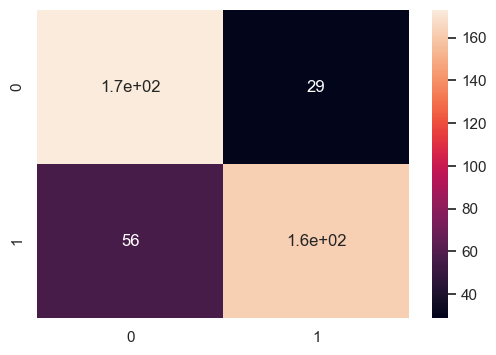

In [67]:
# evaluate the performance of the model
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))
knn_accuracy=accuracy_score(y_test, y_pred)
knn_f1=f1_score(y_test, y_pred)
knn_recall=recall_score(y_test, y_pred)
knn_precision=precision_score(y_test, y_pred)

cf_matrix=confusion_matrix(y_test, y_pred)
plt.figure(figsize = (6,4))
sns.heatmap(cf_matrix, annot=True)

## Logistic Regression

#### It did relatively well at predicting both outcomes, but it's still not a good model, we have better ones.

In [68]:

log_reg = LogisticRegression(random_state = 42, max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

              precision    recall  f1-score   support

           0       0.67      0.74      0.70       202
           1       0.73      0.67      0.70       218

    accuracy                           0.70       420
   macro avg       0.70      0.70      0.70       420
weighted avg       0.71      0.70      0.70       420



<AxesSubplot:>

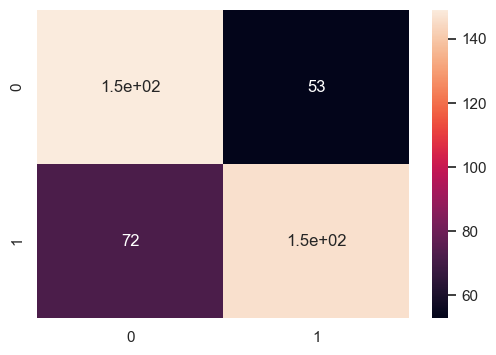

In [69]:
# evaluate the performance of the model
y_pred = log_reg.predict(X_test)
print(classification_report(y_test, y_pred))
logistic_accuracy=accuracy_score(y_test, y_pred)
logistic_f1=f1_score(y_test, y_pred)
logistic_recall=recall_score(y_test, y_pred)
logistic_precision=precision_score(y_test, y_pred)

cf_matrix=confusion_matrix(y_test, y_pred)
plt.figure(figsize = (6,4))
sns.heatmap(cf_matrix, annot=True)

In [70]:
#Summary
xgb_dict = {'Model':'XGB',
                'Accuracy':round(float(xgb_accuracy),2),
                'F1':round(float(xgb_f1),2),
                'Recall':round(float(xgb_recall),2),
                'Precision':round(float(xgb_precision),2)}
               
tree_dict = {'Model':'Decision Tree',
                'Accuracy':round(float(tree_accuracy),2),
                'F1':round(float(tree_f1),2),
                'Recall':round(float(tree_recall),2),
                'Precision':round(float(tree_precision),2)}

random_dict = {'Model':'Random Forest',
                'Accuracy':round(float(random_accuracy),2),
                'F1':round(float(random_f1),2),
                'Recall':round(float(random_recall),2),
                'Precision':round(float(random_precision),2)}

extra_dict = {'Model':'Extra Tree',
                'Accuracy':round(float(extra_accuracy),2),
                'F1':round(float(extra_f1),2),
                'Recall':round(float(extra_recall),2),
                'Precision':round(float(extra_precision),2)}
         
nb_dict = {'Model':'Naive Bayes',
                'Accuracy':round(float(nb_accuracy),2),
                'F1':round(float(nb_f1),2),
                'Recall':round(float(nb_recall),2),
                'Precision':round(float(nb_precision),2)}

knn_dict = {'Model':'KNN',
                'Accuracy':round(float(knn_accuracy),2),
                'F1':round(float(knn_f1),2),
                'Recall':round(float(knn_recall),2),
                'Precision':round(float(knn_precision),2)}
               
logistic_dict = {'Model':'Logistic Regression',
                'Accuracy':round(float(logistic_accuracy),2),
                'F1':round(float(logistic_f1),2),
                'Recall':round(float(logistic_recall),2),
                'Precision':round(float(logistic_precision),2)}

               
result = pd.DataFrame({'XGB':pd.Series(xgb_dict),
                        'Decision Tree':pd.Series(tree_dict),
                        'Random Forest':pd.Series(random_dict),
                        'Extra Trees':pd.Series(extra_dict),
                        'Naive Bayes':pd.Series(nb_dict),
                        'KNN':pd.Series(knn_dict),
                        'Logistic Regression':pd.Series(logistic_dict)
                      })
                      
result                  


,XGB,Decision Tree,Random Forest,Extra Trees,Naive Bayes,KNN,Logistic Regression
Model,XGB,Decision Tree,Random Forest,Extra Tree,Naive Bayes,KNN,Logistic Regression
Accuracy,0.82,0.78,0.81,0.81,0.72,0.8,0.7
F1,0.83,0.78,0.82,0.81,0.73,0.79,0.7
Recall,0.85,0.77,0.83,0.79,0.73,0.74,0.67
Precision,0.82,0.8,0.82,0.84,0.73,0.85,0.73


# References


<p> [1] Aggarwal, A., et al.(2018). Evaluation of Smartphones in Indian Market Using EDAS. Procedia Computer Science, 132(2018), 236-243. </p>
<p> [2] Bhattacharjee, D., et al.(2023). An Integrated Machine Learning and DEMATEL Approach for Feature Preference and Purchase Intention Modelling. Decision Analytics Journal, 6(2023), 1-13. </p>
<p> [3] Singh, R., et al.(2021). Exploratory Data Analysis and Customer Segmentation for Smartphones. International Journal of Scientific Research in Engineering and Management (IJSREM), 5(5), 1-5. </p>
<p> [4] Anshori, M.Y., et al.(2021). Comparison Backpropagation (BP) and Learning Vector Quantification (LVQ) on Classifying Price Range of Smartphone in Market. Journal of Physics: Conference Series, 1836(2021), 1-10. </p>
<p> [5] Mehrotra, D., et al.(2021). Multiclass Classification of Mobile Applications as per Eenergy Consumption. Journal of King Saud University–Computer and Information Sciences, 33(2021), 719-727. </p>

<p> [1] Yan-li, Z. ve Jia, Z. (2012). Research on Data Preprocessing In Credit Card Consuming Behavior Mining. Procedia Computer Science, 17 (2012), 638–643. </p>
<p> [2] Wang, Y., Zhang, Y., Lu, Y. ve Yu, X. (2020). A Comparative Assessment of Credit Risk Model Based on Machine Learning: A Case Study of Bank Loan Data. Procedia Computer Science, 174 (2020), 141–149. </p>
<p> [3] Ziemba, P., Radomska-Zalas, A. ve Becker, J. (2020). Client Evaluation Decision Models in the Credit Scoring Tasks. Procedia Computer Science, 176 (2020), 3301–3309. </p>
<p> [4] Ruyu, B., Mo, H. ve Haifeng, L. (2019). A Comparison of Credit Rating Classification Models Based on Spark- Evidence from Lending-club. Procedia Computer Science, 162 (2019) 811–818. </p>
<p> [5] Wang, K., Li, M., Cheng, J., Zhou, X. ve Li, G. (2022). Research on Personal Credit Risk Evaluation Based on XGBoost. Procedia Computer Science, 199 (2022) 1128–1135. </p>
<p> [6] Wang, H., Chen, W. ve Da, F. (2022). Zhima Credit Score in Default Prediction for Personal Loans. Procedia Computer Science, 199 (2022) 1478–1482. </p>
<p> [7] Bach, M. (2022). New Undersampling Method Based on the KNN Approach. Procedia Computer Science, 207 (2022) 3397–3406. </p>
<p> [8] Gupta, P., Varshney, A., Khan, M. R., Ahmed, R., Shuaib, M. ve Alam, S. (2023). Unbalanced Credit Card Fraud Detection Data: A Machine Learning-Oriented Comparative Study of Balancing Techniques. Procedia Computer Science, 218 (2023) 2575–2584. </p>
<p> [9] Murugan, M. S., T, S. K. ve Marappan, R. (2023). Large-Scale Data-Driven Financial Risk Management and Analysis Using Machine Learning Strategies. Journal Pre-proof, Measurement: Sensors (2023), doi: https://doi.org/10.1016/j.measen.2023.100756 </p>
<p> [10] Okoro, E. E., Obomanu, T., Sanni, S. E., Olatunji, D. I. ve Igbinedion, P. (2022). Application of Artificial İntelligence in Predicting the Dynamics of Bottom Hole Pressure For Under-Balanced Drilling: Extra Tree Compared With Feed Forward Neural Network Model. Petroleum, 8 (2022) 227–236. </p>
<p> [11] Afriyie, J. K., Tawiah, K., Pels, W. A., Addai-Henne, S., Dwamena, H. A., Owiredu, E. O., Ayeh, S. A. ve Eshun, J. (2023). A Supervised Machine Learning Algorithm For Detecting and Predicting Fraud in Credit Card Transactions. Decision Analytics Journal, 6 (2023) 100163. </p>
<p> [12] Bhattacharjee, D., Ramesh, K., Jayaram, E. S., Mathad, M. S. ve Puhan, D. (2023). An Integrated Machine Learning and DEMATEL Approach for Feature Preference and Purchase Intention Modelling. Decision Analytics Journal, 6 (2023), 1–13. </p>
<p> [13] Mehrotra, D., Srivastava, R., Nagpal, R. ve Nagpal, D. (2021). Multiclass Classification of Mobile Applications as per Energy Consumption. Journal of King Saud University–Computer and Information Sciences, 33 (2021), 719–727. </p>
<p> [14] Zhu, X., Chu, Q., Song, X., Hu, P. ve Peng, L. (2023). Explainable Prediction of Loan Default Based on Machine Learning Models. Journal Pre-proof, Data Science and Management (2023), doi: https://doi.org/10.1016/j.dsm.2023.04.003 </p>
<p> [15] Anshori, M. Y., Rahmalia, D. ve Herlambang, T. (2021). Comparison Backpropagation (BP) and Learning Vector Quantification (LVQ) on Classifying Price Range of Smartphone in Market. Journal of Physics: Conference Series, 1836 (2021), 1-10.
 </p>
<p> [16] https://www.kaggle.com/datasets/ppb00x/credit-risk-customers, Date of Access: 11.05.2023. </p>
<p> [17] https://www.kaggle.com/code/dimitriosthomaidis/xgboost-feature-engineering, Date of Access: 11.05.2023. </p>
<p> [18] https://www.kaggle.com/code/raphaelmarconato/credit-risk-eda-and-machine-learning-73, Date of Access: 11.05.2023. </p>
<p> [19] https://www.kaggle.com/code/subhranilmondal12/data-visualization-mlmodel-withcross-validation, Date of Access: 11.05.2023. </p>